<a href="https://colab.research.google.com/github/Pranav-Reddy-Pedaballe/Credit-Card-Behaviour-Score-Prediction/blob/main/Credit_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random
np.random.seed(42)
random.seed(42)

#Import the Data

In [ ]:
df=pd.read_csv("/content/train_dataset_final1.csv")

In [ ]:
df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


Drop Customer_ID column as each customer ID is unique and has no effect on default/non-default and thus will not help in the training

In [ ]:
df=df.drop('Customer_ID',axis=1)

In [ ]:
df.dtypes

,0
marriage,int64
sex,int64
education,int64
LIMIT_BAL,int64
age,float64
pay_0,int64
pay_2,int64
pay_3,int64
pay_4,int64
pay_5,int64


#DATA CORRECTION

In [ ]:
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


There is an extra value 0 , which is not in the given category values , since they are neither 1 nor 2 we can place them under others which is 3 , thus we replace all 0 values with 3.

In [ ]:
df['marriage'] = df['marriage'].replace(0, 3)

In [ ]:
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,326


In [ ]:
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


There are extra values 0,5 and 6 , which are not in the given category values , since they are neither 1 nor 2 nor 3 we can place them under others which is 4 , thus we replace all values with 0,5,6 with 4.

In [ ]:
df['education'] = df['education'].replace([0, 5, 6], 4)

In [ ]:
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [ ]:
df['next_month_default'].value_counts()

,count
next_month_default,
0,20440
1,4807


# Missing Values

---



In [ ]:
df.isnull().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0


The age column has 126 rows with missing values, thus we replace it with the median of the column has it introduces less bias and we don't lose information from the other columns.

In [ ]:
df['age']=df['age'].replace(np.nan,df['age'].median())

In [ ]:
df.isnull().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0


#Visualising the columns

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

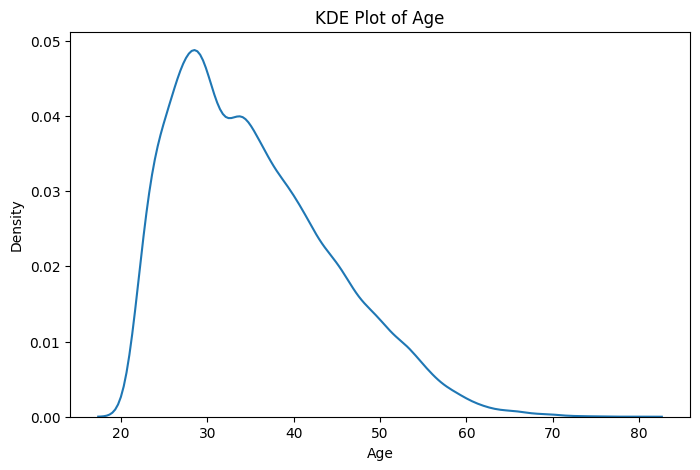

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['age'])
plt.title("KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


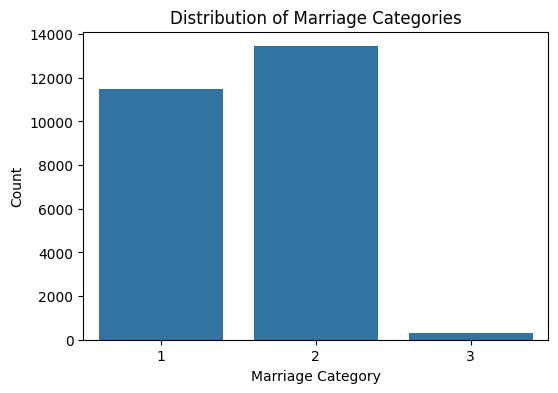

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marriage', data=df)
plt.title("Distribution of Marriage Categories")
plt.xlabel("Marriage Category")
plt.ylabel("Count")
plt.show()


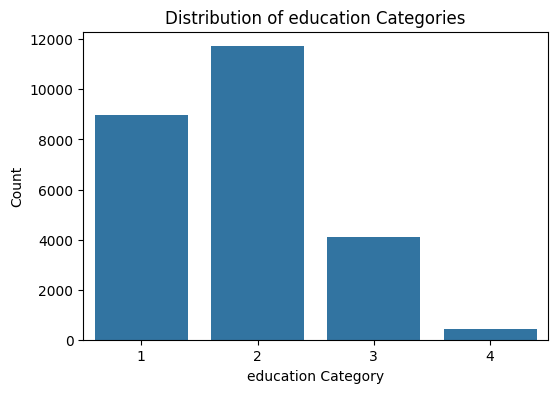

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=df)
plt.title("Distribution of education Categories")
plt.xlabel("education Category")
plt.ylabel("Count")
plt.show()

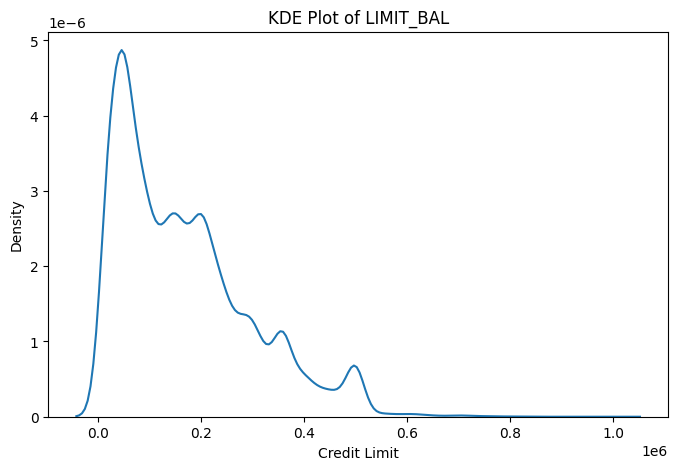

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['LIMIT_BAL'])
plt.title("KDE Plot of LIMIT_BAL")
plt.xlabel("Credit Limit")
plt.ylabel("Density")
plt.show()

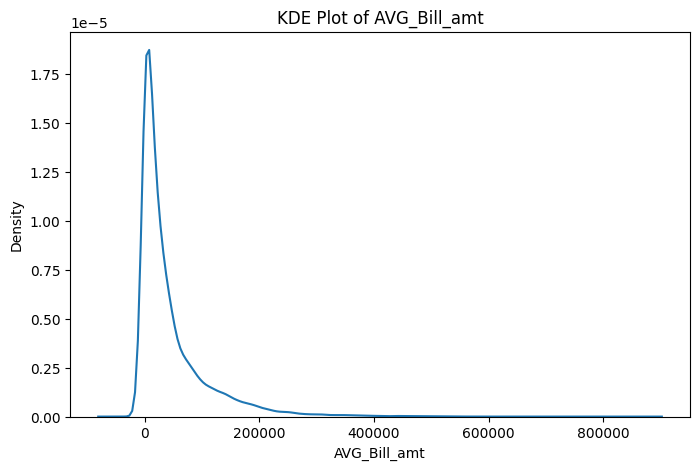

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['AVG_Bill_amt'])
plt.title("KDE Plot of AVG_Bill_amt")
plt.xlabel("AVG_Bill_amt")
plt.ylabel("Density")
plt.show()

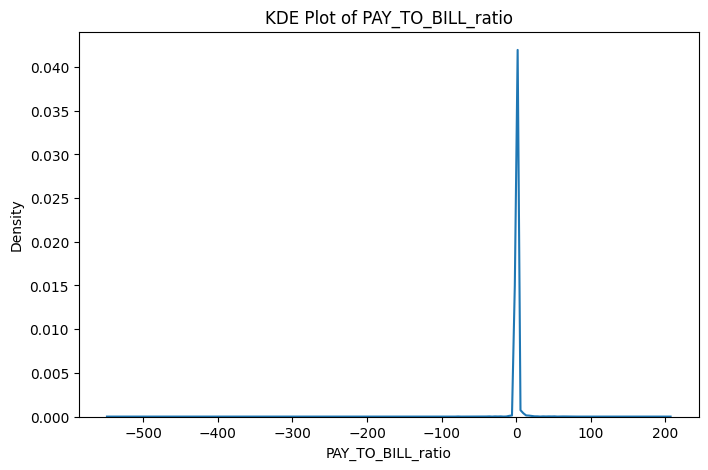

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['PAY_TO_BILL_ratio'])
plt.title("KDE Plot of PAY_TO_BILL_ratio")
plt.xlabel("PAY_TO_BILL_ratio")
plt.ylabel("Density")
plt.show()

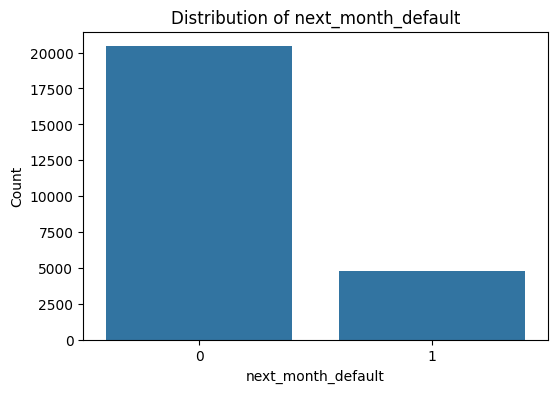

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='next_month_default', data=df)
plt.title("Distribution of next_month_default")
plt.xlabel("next_month_default")
plt.ylabel("Count")
plt.show()

#Feature Engineering

checking if any month has bill amt > limit_bal , this means the customer has borrowed more than he is allowed to which may cause a default

first checking for each and every month;

1 if bill_amt is greater than limit_bal,
0 if bill_amt is lesser than limit_bal

In [ ]:
for m in range(1,7):
  df[f'bill_over_m{m}'] = (df[f'Bill_amt{m}'] > df['LIMIT_BAL']).astype(int)

Next we count the number of months a custom er has bill_amt more than the LIMIT_BAL

In [ ]:
df['months_over'] = df[[f'bill_over_m{i}' for i in range(1,7)]].sum(axis=1)

In [ ]:
df['months_over'].value_counts()

,count
months_over,
0,21979
1,1535
2,801
3,440
4,239
6,136
5,117


Let's add a column for the number of months the bill is due for each customer

In [ ]:
df['months_billdue']=(df[[f'Bill_amt{i}' for i in range(1,7)]]>0).sum(axis=1)

In [ ]:
df['months_billdue'].value_counts()

,count
months_billdue,
6,19815
5,2479
4,1364
3,880
2,453
1,169
0,87


We add a column based on the number of months the customer has delayed payments that is the customer has not paid the minimum amount

In [ ]:
df['payment_delay'] = (df[[f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]]>0).sum(axis=1)

We add a column which stores the maximum months delay a customer has made

In [ ]:
df['max_payment_delay'] = df[[f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]].max(axis=1)

We create a new column baseed on utilization which is equal to the Bill amt /Limit BAl

In [ ]:
for i in range(1, 7):
  df[f'utilization_m{i}']=df[f'Bill_amt{i}']/df['LIMIT_BAL']

In [ ]:
df['avg_utilization'] = df[[f'utilization_m{i}' for i in range(1, 7)]].mean(axis=1)

In [ ]:
df['max_utilization'] = df[[f'utilization_m{i}' for i in range(1, 7)]].max(axis=1)

ONCE SEE THIS
```
 #Number of months with >90% utilization — risky behavior
df['months_util_gt90'] = sum([(df[f'credit_util_m{i}'] > 0.9).astype(int) for i in range(1, 7)])

df['util_band'] = pd.cut(df['avg_credit_util'],
                         bins=[-0.01, 0.3, 0.6, 0.9, 1.2, np.inf],
                         labels=['<30%', '30-60%', '60-90%', '90-120%', '>120%'])
```                         

Repayment ratio

payment in month m / bill in month m-1

In [ ]:
for i in range(1, 6):
  df[f'paybill_ratio_{i}'] = df[f'pay_amt{i+1}'] / (df[f'Bill_amt{i}'] + 1e-3) #add 1e-3 to avoid division by 0

In [ ]:
df['avg_paybill_ratio'] = df[[f'paybill_ratio_{i}' for i in range(1, 6)]].mean(axis=1)


Total paid/Total Bill_amt

In [ ]:
df['tot_paybill_ratio']=(df[[f'pay_amt{i}' for i in range(1,7)]].sum(axis=1))/(df[[f'Bill_amt{i}' for i in range(1,7)]].sum(axis=1)+1e-3)

now we take the standard deviation of the paybill ratio to measure the consistency of the payment

In [ ]:
df['std_paybill_ratio'] = df[[f'paybill_ratio_{i}' for i in range(1, 6)]].std(axis=1)

###deliquency streak

In [ ]:
pay_ch = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]

def delinquency_streak(x):
  flag = [(x[y] > 0) for y in pay_ch]
  max_str = 0
  curr_str = 0
  for i in flag:
    if i==True:
      curr_str += 1
    else:
      max_str = max(max_str,curr_str)
      curr_str = 0
  max_str = max(max_str,curr_str)

  return max_str

df['delinquency_streak'] = df.apply(delinquency_streak, axis=1)

In [ ]:
df['delinquency_count'] = df[pay_ch].apply(lambda row: (row >= 0).sum(), axis=1)

Difference between actual bill avg and calculated bill avg

In [ ]:
df['diff']=((df['Bill_amt1']+df['Bill_amt2']+df['Bill_amt3']+df['Bill_amt4']+df['Bill_amt5']+df['Bill_amt6'])/6)-(df['AVG_Bill_amt'])

In [ ]:
df['diff'].value_counts()

,count
diff,
0.000000,54
-0.021667,39
0.125000,36
0.036667,35
0.021667,33
...,...
-0.910000,1
1.483333,1
524.405000,1


In [ ]:
df['diff'].describe()

,diff
count,25247.000000
mean,37.294943
std,700.177240
min,-1.236667
25%,-0.140000
50%,0.055000
75%,0.255000
max,56600.143333


#Visualising the new features

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'bill_over_m1', 'bill_over_m2', 'bill_over_m3', 'bill_over_m4',
       'bill_over_m5', 'bill_over_m6', 'months_over', 'months_billdue',
       'payment_delay', 'max_payment_delay', 'utilization_m1',
       'utilization_m2', 'utilization_m3', 'utilization_m4', 'utilization_m5',
       'utilization_m6', 'avg_utilization', 'max_utilization',
       'paybill_ratio_1', 'paybill_ratio_2', 'paybill_ratio_3',
       'paybill_ratio_4', 'paybill_ratio_5', 'avg_paybill_ratio',
       'tot_paybill_ratio', 'std_paybill_ratio', 'delinquency_streak',
       'delinquency_count', 'diff'],
      dtype='object')

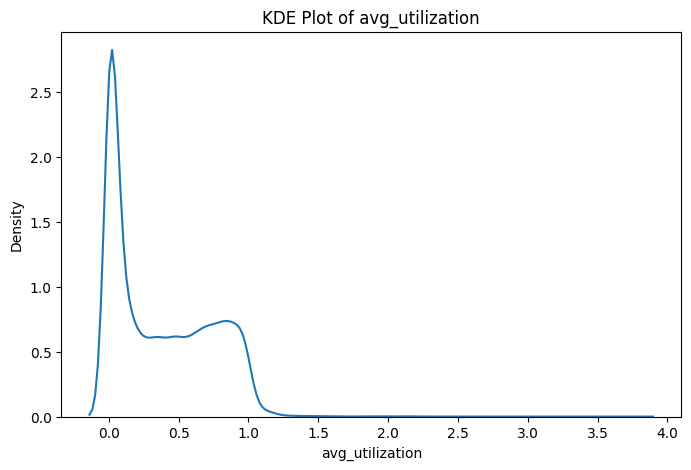

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['avg_utilization'])
plt.title("KDE Plot of avg_utilization")
plt.xlabel("avg_utilization")
plt.ylabel("Density")
plt.show()

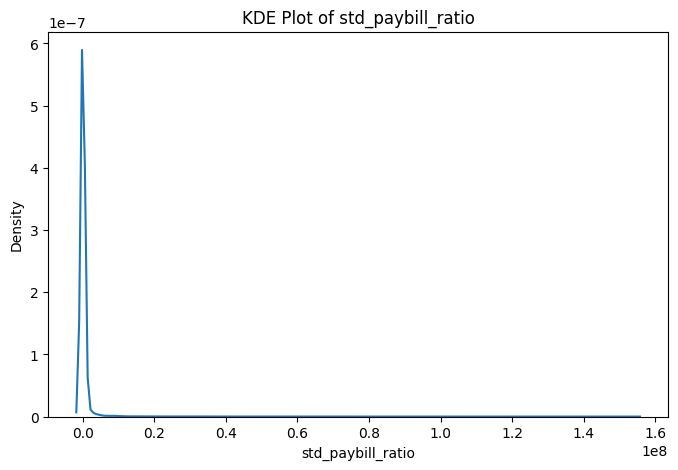

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['std_paybill_ratio'])
plt.title("KDE Plot of std_paybill_ratio")
plt.xlabel("std_paybill_ratio")
plt.ylabel("Density")
plt.show()

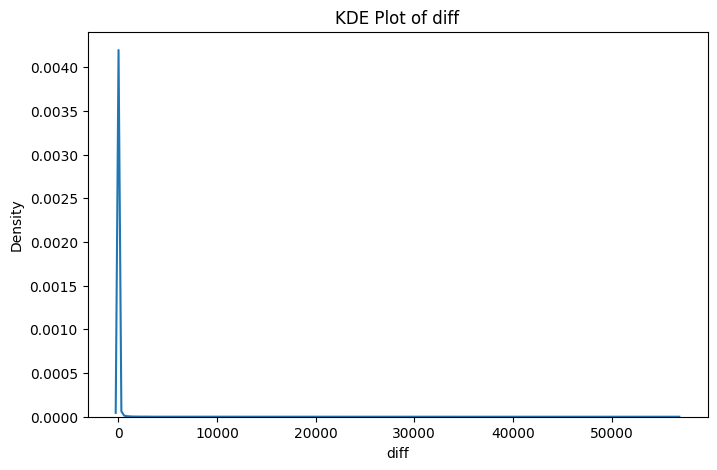

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['diff'])
plt.title("KDE Plot of diff")
plt.xlabel("diff")
plt.ylabel("Density")
plt.show()

#Behavioural Trends with respect to next_month_default

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'bill_over_m1', 'bill_over_m2', 'bill_over_m3', 'bill_over_m4',
       'bill_over_m5', 'bill_over_m6', 'months_over', 'months_billdue',
       'payment_delay', 'max_payment_delay', 'utilization_m1',
       'utilization_m2', 'utilization_m3', 'utilization_m4', 'utilization_m5',
       'utilization_m6', 'avg_utilization', 'max_utilization',
       'paybill_ratio_1', 'paybill_ratio_2', 'paybill_ratio_3',
       'paybill_ratio_4', 'paybill_ratio_5', 'avg_paybill_ratio',
       'tot_paybill_ratio', 'std_paybill_ratio', 'delinquency_streak',
       'delinquency_count', 'diff'],
      dtype='object')

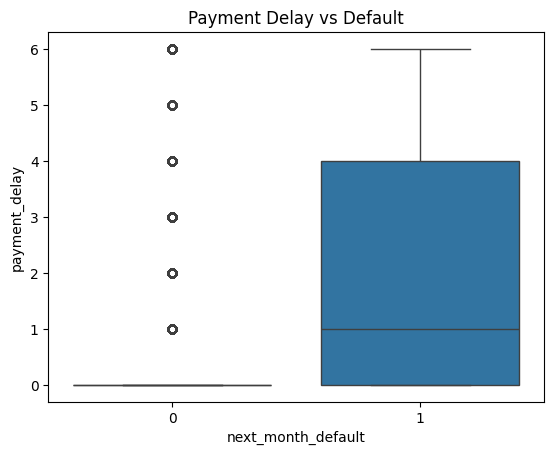

In [ ]:
sns.boxplot(x='next_month_default', y='payment_delay', data=df)
plt.title("Payment Delay vs Default")
plt.show()


This shows that in most cases non defaulters have 0 payment delays whereas defaulters show a history of more than 0 payment delays.

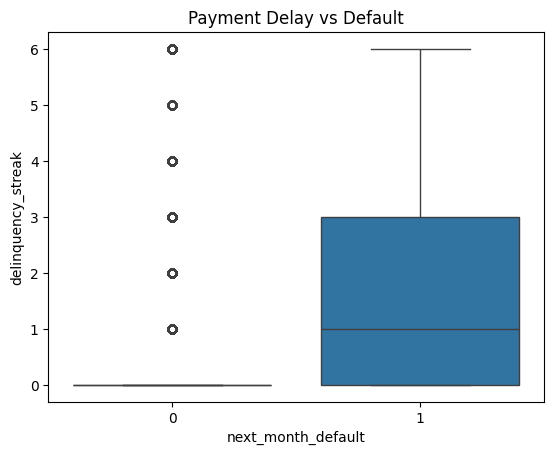

In [ ]:
sns.boxplot(x='next_month_default', y='delinquency_streak', data=df)
plt.title("Payment Delay vs Default")
plt.show()

In [ ]:
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,326


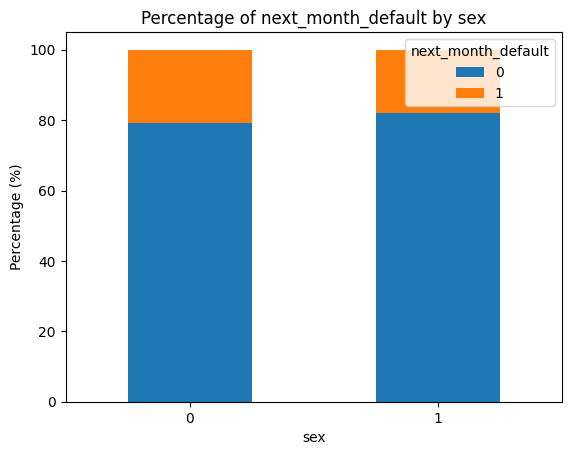

In [ ]:
counts = df.groupby(['sex', 'next_month_default']).size().unstack(fill_value=0)
percent_df = counts.div(counts.sum(axis=1), axis=0) * 100
percent_df.plot(kind='bar', stacked=True)
plt.title("Percentage of next_month_default by sex")
plt.xlabel("sex")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

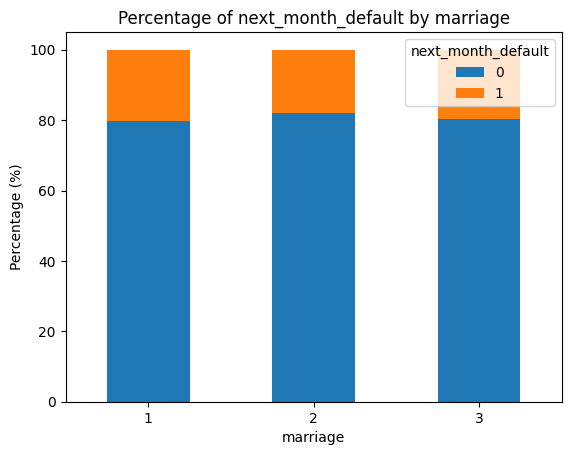

In [ ]:
counts = df.groupby(['marriage', 'next_month_default']).size().unstack(fill_value=0)
percent_df = counts.div(counts.sum(axis=1), axis=0) * 100
percent_df.plot(kind='bar', stacked=True)
plt.title("Percentage of next_month_default by marriage")
plt.xlabel("marriage")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()


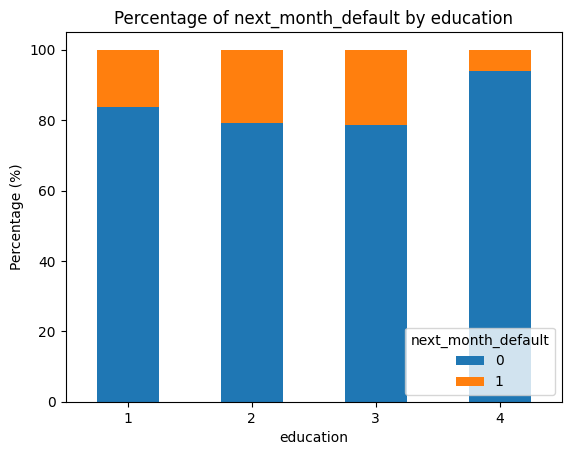

In [ ]:
counts = df.groupby(['education', 'next_month_default']).size().unstack(fill_value=0)
percent_df = counts.div(counts.sum(axis=1), axis=0) * 100
percent_df.plot(kind='bar', stacked=True)
plt.title("Percentage of next_month_default by education")
plt.xlabel("education")
plt.ylabel("Percentage (%)")
plt.legend(title="next_month_default", loc="lower right")
plt.xticks(rotation=0)
plt.show()

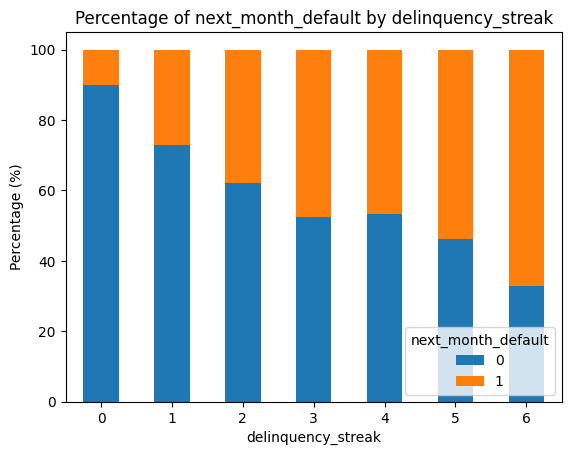

In [ ]:
counts = df.groupby(['delinquency_streak', 'next_month_default']).size().unstack(fill_value=0)
percent_df = counts.div(counts.sum(axis=1), axis=0) * 100
percent_df.plot(kind='bar', stacked=True)
plt.title("Percentage of next_month_default by delinquency_streak")
plt.xlabel("delinquency_streak")
plt.ylabel("Percentage (%)")
plt.legend(title="next_month_default", loc="lower right")
plt.xticks(rotation=0)
plt.show()

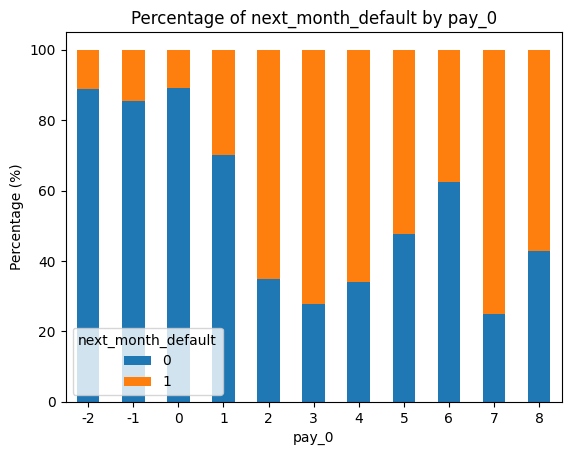

In [ ]:
counts = df.groupby(['pay_0', 'next_month_default']).size().unstack(fill_value=0)
percent_df = counts.div(counts.sum(axis=1), axis=0) * 100
percent_df.plot(kind='bar', stacked=True)
plt.title("Percentage of next_month_default by pay_0")
plt.xlabel("pay_0")
plt.ylabel("Percentage (%)")
plt.legend(title="next_month_default", loc="lower left")
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'bill_over_m1', 'bill_over_m2', 'bill_over_m3', 'bill_over_m4',
       'bill_over_m5', 'bill_over_m6', 'months_over', 'months_billdue',
       'payment_delay', 'max_payment_delay', 'utilization_m1',
       'utilization_m2', 'utilization_m3', 'utilization_m4', 'utilization_m5',
       'utilization_m6', 'avg_utilization', 'max_utilization',
       'paybill_ratio_1', 'paybill_ratio_2', 'paybill_ratio_3',
       'paybill_ratio_4', 'paybill_ratio_5', 'avg_paybill_ratio',
       'tot_paybill_ratio', 'std_paybill_ratio', 'delinquency_streak',
       'delinquency_count', 'diff'],
      dtype='object')

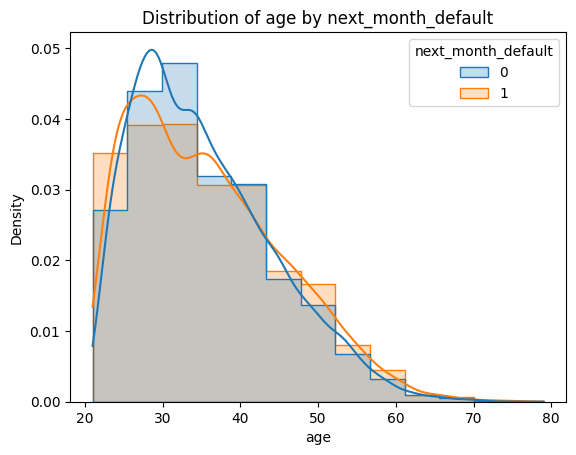

In [ ]:
sns.histplot(data=df, x='age', hue='next_month_default', bins=13, kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribution of age by next_month_default")
plt.show()

Thus people below the age of 25 and above 45 are more likely to default

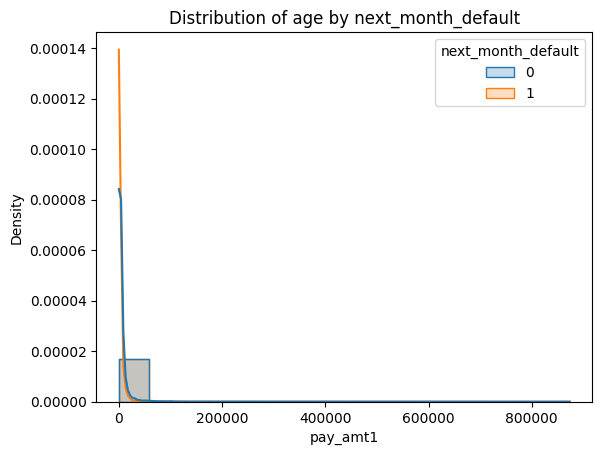

In [ ]:
sns.histplot(data=df, x='pay_amt1', hue='next_month_default', bins=15, kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribution of age by next_month_default")
plt.show()

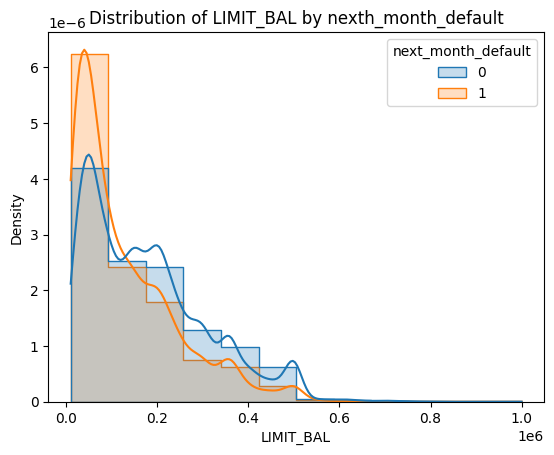

In [ ]:
sns.histplot(data=df, x='LIMIT_BAL', hue='next_month_default', bins=12, kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribution of LIMIT_BAL by nexth_month_default")
plt.show()

Thus people with lower limit_bal are likely to default approx below 0.1


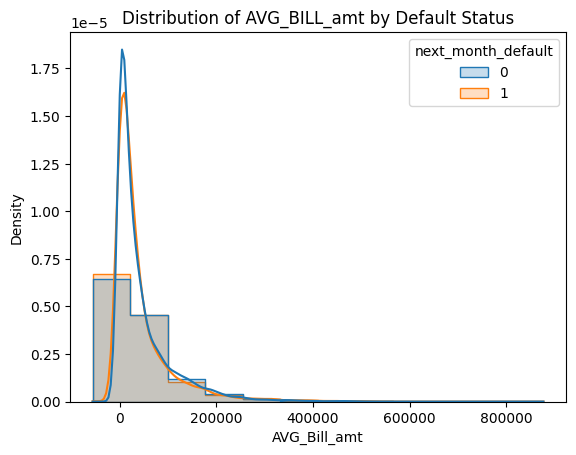

In [ ]:
sns.histplot(data=df, x='AVG_Bill_amt', hue='next_month_default', bins=12, kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribution of AVG_BILL_amt by Default Status")
plt.show()

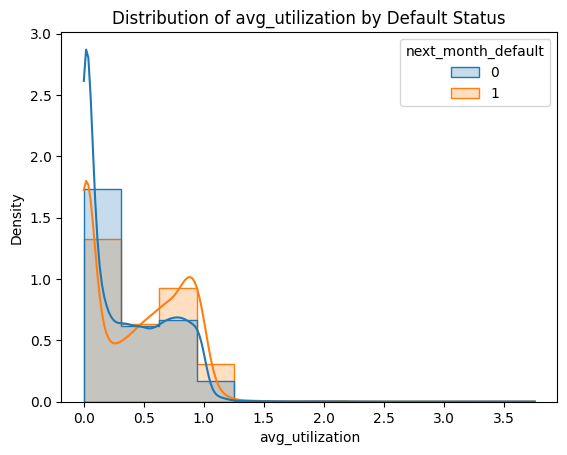

In [ ]:
sns.histplot(data=df, x='avg_utilization', hue='next_month_default', bins=12, kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribution of avg_utilization by Default Status")
plt.show()

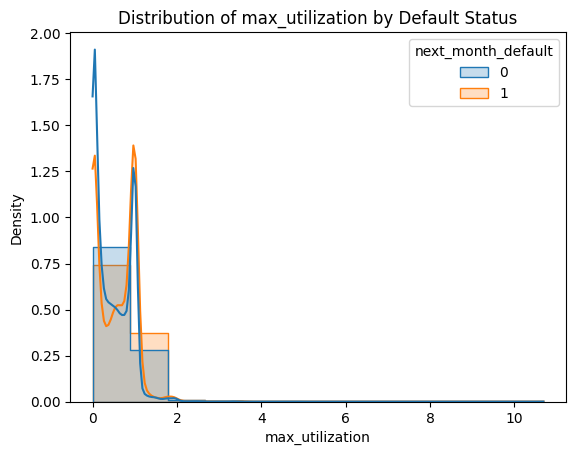

In [ ]:
 sns.histplot(data=df, x='max_utilization', hue='next_month_default', bins=12, kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribution of max_utilization by Default Status")
plt.show()

People with max_utilization more than 1 are more likely to default

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'bill_over_m1', 'bill_over_m2', 'bill_over_m3', 'bill_over_m4',
       'bill_over_m5', 'bill_over_m6', 'months_over', 'months_billdue',
       'payment_delay', 'max_payment_delay', 'utilization_m1',
       'utilization_m2', 'utilization_m3', 'utilization_m4', 'utilization_m5',
       'utilization_m6', 'avg_utilization', 'max_utilization',
       'paybill_ratio_1', 'paybill_ratio_2', 'paybill_ratio_3',
       'paybill_ratio_4', 'paybill_ratio_5', 'avg_paybill_ratio',
       'tot_paybill_ratio', 'std_paybill_ratio', 'delinquency_streak',
       'delinquency_count', 'diff'],
      dtype='object')

#Feature importances

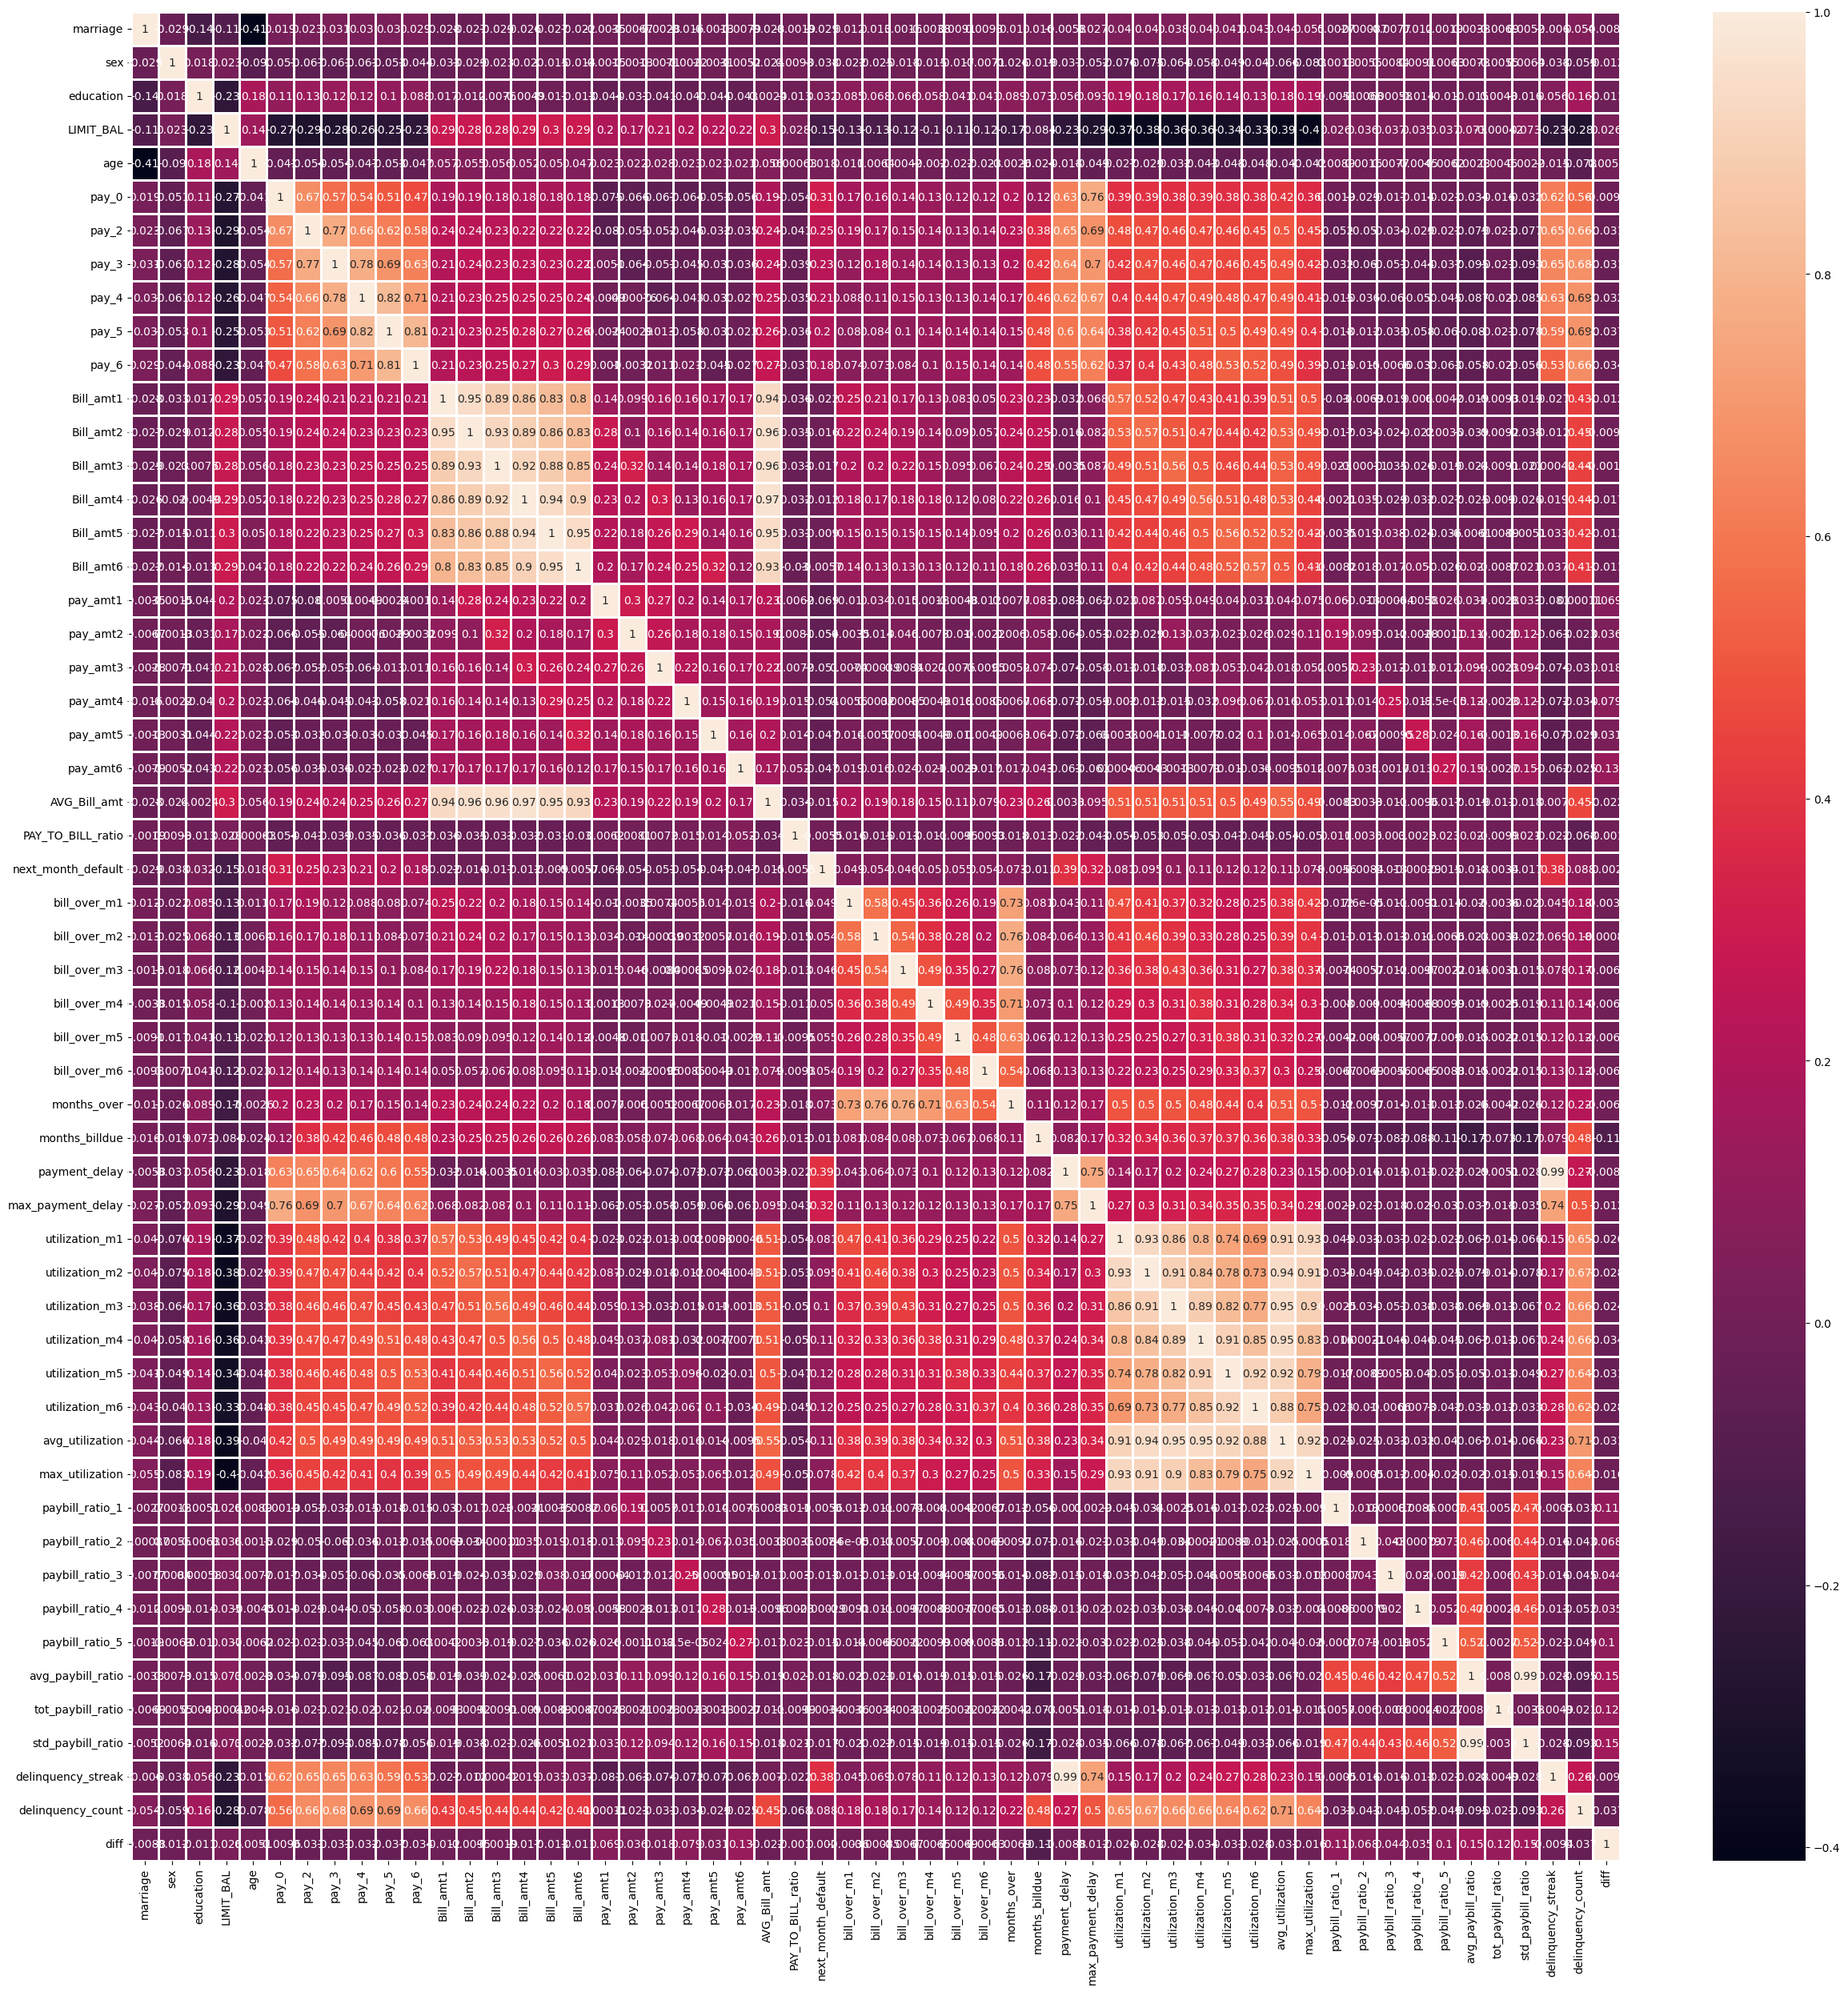

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,30))
corr=df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()



High correlation between AVG_Bill_amt and all Bill_amt , so we'll drop all Bill_amt

In [ ]:
df=df.drop([f'Bill_amt{i}' for i in range(1,7)],axis=1)

High correlation between avg utilization and individual utilization

In [ ]:
df=df.drop([f'utilization_m{i}' for i in range(1,7)],axis=1)
#

Now deliquency streak and payment delay have correlation of 0.99 , so we drop one , we will see later which one of the two to drop.

In [ ]:
df

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,paybill_ratio_2,paybill_ratio_3,paybill_ratio_4,paybill_ratio_5,avg_paybill_ratio,tot_paybill_ratio,std_paybill_ratio,delinquency_streak,delinquency_count,diff
0,2,0,2,60000,25.0,2,2,2,0,0,...,0.018687,0.032259,5.244491e-02,0.067604,0.034199,0.031947,0.026752,3,6,-0.001667
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,0.000000,3064.812713,0.000000e+00,0.499718,613.062489,0.266263,1370.570058,0,3,0.576667
2,1,0,2,180000,63.0,0,0,0,0,0,...,0.037727,0.039980,3.789245e-02,0.038530,0.040005,0.039850,0.003412,0,6,-0.316667
3,1,1,2,210000,43.0,0,0,0,0,0,...,0.036597,0.029607,3.217049e-02,0.035964,0.034286,0.035660,0.003255,0,6,0.255000
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,45.071003,0.659062,2.225562e-07,0.000129,9.178442,0.723902,20.066371,0,0,-0.076667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,1,1,2,90000,33.0,0,0,0,0,2,...,0.104720,0.067551,4.357857e-02,0.035580,0.060888,0.054621,0.027238,2,6,0.535000
25243,1,0,2,60000,49.0,0,0,0,0,0,...,0.037453,0.038348,2.265585e-01,0.133679,0.094551,0.144262,0.084736,0,6,-0.133333
25244,2,0,1,120000,31.0,-1,-1,-1,-1,-1,...,0.405254,3.128859,1.844940e+01,1.725269,4.941749,1.313907,7.619158,0,0,-0.226667
25245,1,1,4,390000,40.0,0,0,0,0,0,...,0.027858,0.027947,2.989968e-02,0.034783,0.029875,0.031295,0.002866,0,6,-0.260000


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
y=df['next_month_default']
x=df.drop('next_month_default',axis=1)

model=ExtraTreesClassifier(random_state=42)
model.fit(x,y)
print(model.feature_importances_)

[0.01808638 0.01337467 0.02302496 0.03444157 0.03639396 0.04509035
 0.02025341 0.01564589 0.01508057 0.0128849  0.01548049 0.03184008
 0.02987339 0.03069341 0.0304975  0.03083951 0.03039181 0.03183315
 0.02598618 0.00359313 0.00338546 0.00315927 0.00297318 0.00274965
 0.00288372 0.00691644 0.01233811 0.05288291 0.02399086 0.03521356
 0.03436142 0.03062319 0.02935987 0.02996938 0.03078164 0.03090238
 0.02745948 0.03104002 0.02799364 0.04230814 0.01036891 0.03303349]


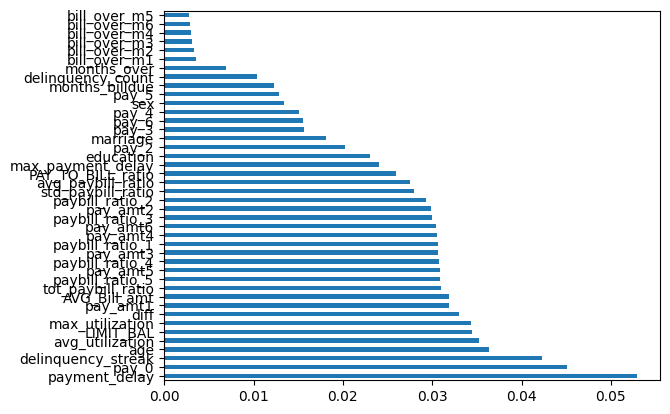

In [ ]:
#In below code we map feature_importances with the columns
feature_importances = pd.Series(model.feature_importances_,index=x.columns)
#.nlargest(41) means we take 10 largest values and then we plot in bar horizontal columns.
feature_importances.nlargest(42).plot(kind='barh')
plt.show()

since there is a very high correlation between std_paybillratio and avg_paybill_ratio (>0.9) we drop the column with lesser feature importance which is avg_paybill_ratio

In [ ]:
df=df.drop('avg_paybill_ratio',axis=1)

since there is a very high correlation between delinqunecy_streak and payment_delay (>0.9) we drop the column with lesser feature importance which is delinquency_streak.

In [ ]:
df=df.drop(['delinquency_streak'],axis=1)

since there is a very high correlation between max_utilization and avg_utilization (>0.9) we drop the column with lesser feature importance which is max_utilization.

In [ ]:
df=df.drop(['max_utilization'],axis=1)

Print the 10 least important scores

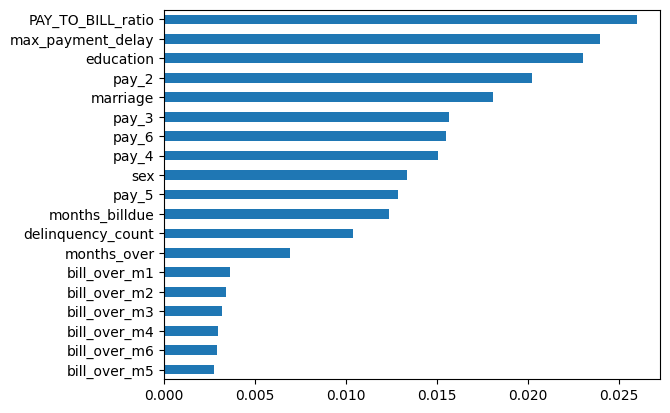

In [ ]:
feature_importances.nsmallest(19).plot(kind='barh')
plt.show()

In [ ]:
df=df.drop(['bill_over_m1','bill_over_m2','bill_over_m3','bill_over_m4','bill_over_m5','bill_over_m6',],axis=1)

In [ ]:
df=df.drop(['months_over','delinquency_count','months_billdue'],axis=1)

#Training

First the above code was run and SMOTE+CLass weight was tested for 6 different models , logistic regression , Random Forest , XGB classifier , DecisionTreeClassifier , Gaussian NB and KNeighboursClassification .

The above code was again run and SMOTE+ Downsampling was tested seperately.

##SMOTE+ Class Weight

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
y=df['next_month_default']
x=df.drop('next_month_default',axis=1)
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_Train, Y_Train = sm.fit_resample(X_Train, Y_Train)

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, fbeta_score, roc_auc_score
model = LogisticRegression(class_weight='balanced',random_state=42)
model=model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.41
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.38831683168316833 

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.27      0.42      4095
           1       0.22      0.90      0.36       955

    accuracy                           0.39      5050
   macro avg       0.57      0.59      0.39      5050
weighted avg       0.79      0.39      0.40      5050
 

Confusion matrix : 
 [[1097 2998]
 [  91  864]] 

F2 Score: 0.5624
AUC-ROC Score: 0.6309


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.4099999999999998
Best F2 value: 0.5623535537620411


In [ ]:
from xgboost import XGBClassifier

ratio = Y_Train.value_counts()[0] / Y_Train.value_counts()[1]
model = XGBClassifier(scale_pos_weight=ratio, random_state=42)
model = model.fit(X_Train,Y_Train)
#pred = model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.11
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.5465346534653466 

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.48      0.63      4095
           1       0.27      0.85      0.41       955

    accuracy                           0.55      5050
   macro avg       0.60      0.66      0.52      5050
weighted avg       0.81      0.55      0.59      5050
 

Confusion matrix : 
 [[1952 2143]
 [ 147  808]] 

F2 Score: 0.5967
AUC-ROC Score: 0.7596


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.11
Best F2 value: 0.5966622360064983


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced',random_state=42)
model = model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.28
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

final_model=model

Accuracy :  0.6578217821782179 

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.63      0.75      4095
           1       0.33      0.80      0.47       955

    accuracy                           0.66      5050
   macro avg       0.63      0.71      0.61      5050
weighted avg       0.82      0.66      0.69      5050
 

Confusion matrix : 
 [[2562 1533]
 [ 195  760]] 

F2 Score: 0.6216
AUC-ROC Score: 0.7850


We are getting the best F2 score from this model , and hence we take this model as our final model.

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)


Best F2 threshold: 0.2799999999999999
Best F2 value: 0.6216260428594798


 98%|===================| 197/200 [00:32<00:00]       

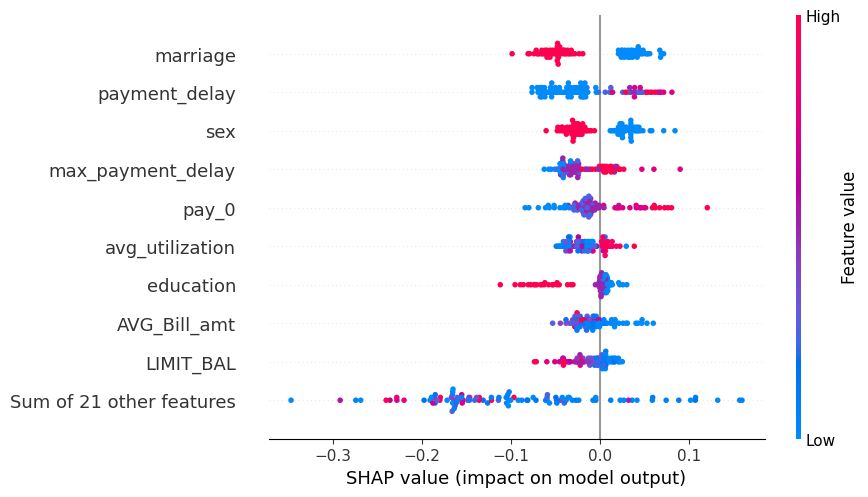

In [ ]:
import shap

# Sample test set for SHAP (100 rows)
X_sample = X_Test.sample(100, random_state=42)

# Ensure columns match training set
X_sample = X_sample[X_Train.columns]

# Create SHAP explainer (auto-detects model type)
explainer = shap.Explainer(model, X_Train)

# Compute SHAP values
shap_values = explainer(X_sample)

# SHAP summary plot (beeswarm)
shap.plots.beeswarm(shap_values[:,:,1])



In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(class_weight='balanced', random_state=42)
model = model.fit(X_Train, Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]
threshold = 0.21
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ", accuracy_score(Y_Test, pred), "\n")
print("Classification report: \n", classification_report(Y_Test, pred), "\n")
print("Confusion matrix : \n", confusion_matrix(Y_Test, pred), "\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

[LightGBM] [Info] Number of positive: 16345, number of negative: 16345
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4927
[LightGBM] [Info] Number of data points in the train set: 32690, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy :  0.6453465346534654 

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.61      0.74      4095
           1       0.32      0.79      0.46       955

    accuracy                           0.65      5050
   macro avg       0.62      0.70      0.60      5050
weighted avg       0.81      0.65      0.68      5050
 

Confusion matrix : 
 [[2505 1590]
 [ 201  754]] 

F2 Score: 0.6116
AUC-ROC Score: 0.7774


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.20999999999999996
Best F2 value: 0.6116158338741077


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(class_weight='balanced',random_state=42)
model=model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.1
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.7164356435643564 

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.77      0.82      4095
           1       0.33      0.47      0.39       955

    accuracy                           0.72      5050
   macro avg       0.60      0.62      0.60      5050
weighted avg       0.76      0.72      0.73      5050
 

Confusion matrix : 
 [[3166  929]
 [ 503  452]] 

F2 Score: 0.4345
AUC-ROC Score: 0.6232


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.1
Best F2 value: 0.43453182080369157


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model=model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.89
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.27980198019801983 

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.13      0.22      4095
           1       0.20      0.94      0.33       955

    accuracy                           0.28      5050
   macro avg       0.55      0.53      0.28      5050
weighted avg       0.77      0.28      0.24      5050
 

Confusion matrix : 
 [[ 514 3581]
 [  56  899]] 

F2 Score: 0.5416
AUC-ROC Score: 0.6249


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.8899999999999996
Best F2 value: 0.541566265060241


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_Train,Y_Train)
#pred = model.predict(X_Test)

y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.1
pred = (y_prob >= threshold).astype(int)


print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.4067326732673267 

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.32      0.47      4095
           1       0.21      0.78      0.33       955

    accuracy                           0.41      5050
   macro avg       0.54      0.55      0.40      5050
weighted avg       0.74      0.41      0.44      5050
 

Confusion matrix : 
 [[1307 2788]
 [ 208  747]] 

F2 Score: 0.5078
AUC-ROC Score: 0.5947


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.1
Best F2 value: 0.5078178110129163


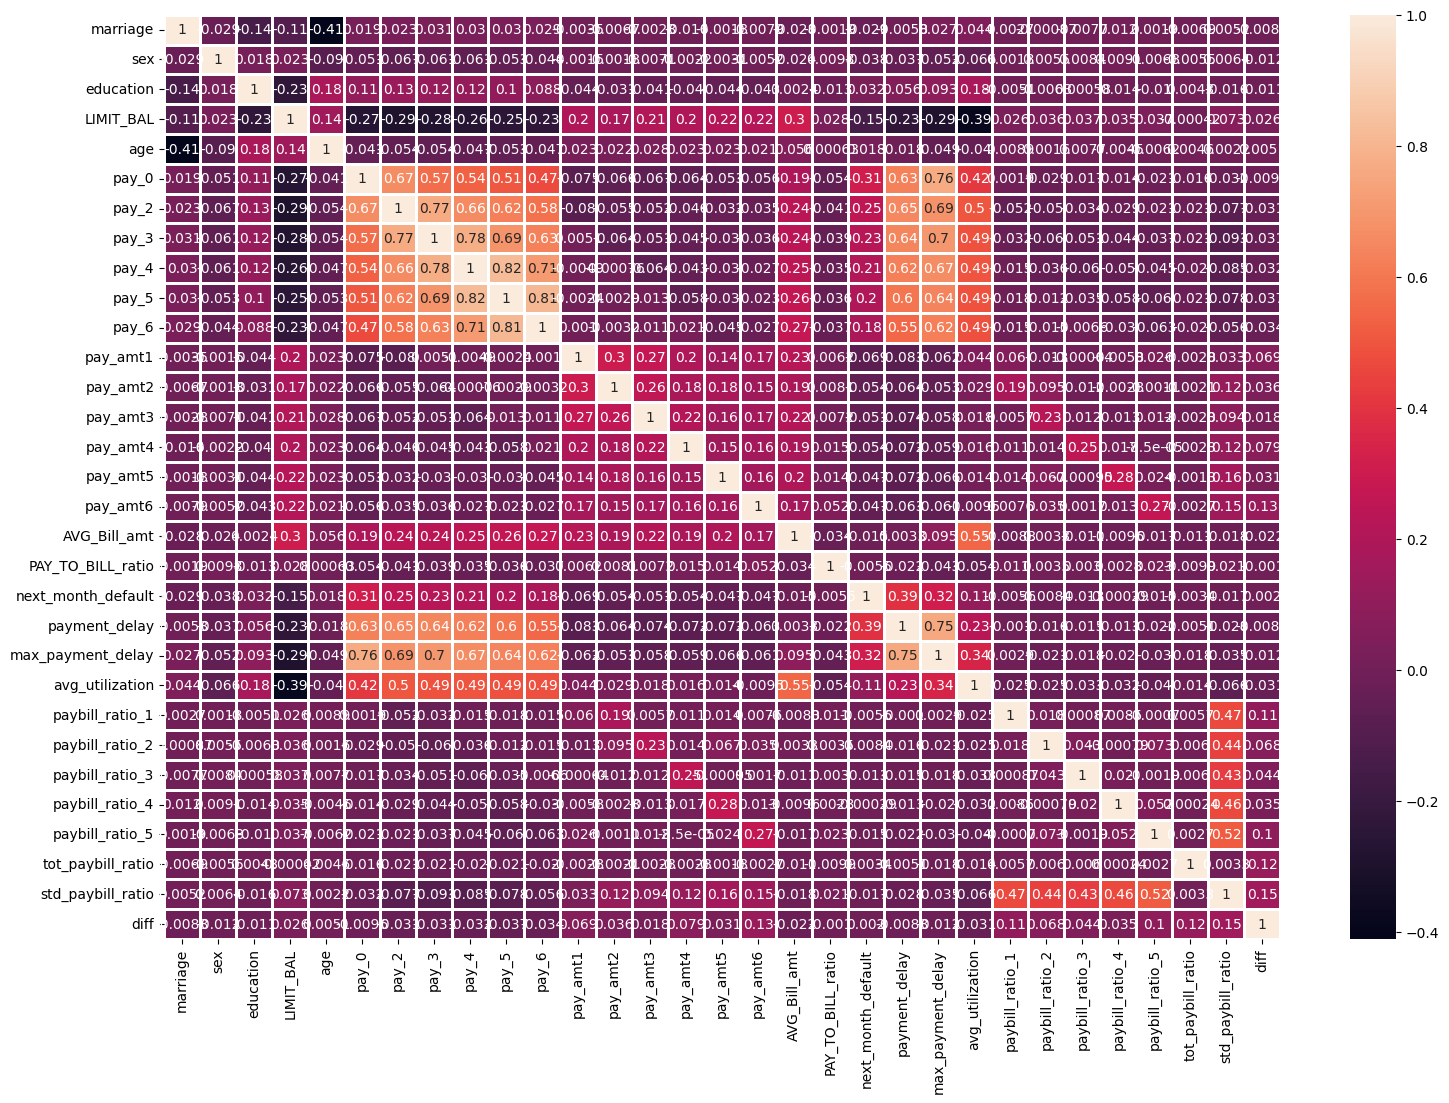

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

##Trying SMOTE+ class downsampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Separate target and features
y = df['next_month_default']
x = df.drop('next_month_default', axis=1)

# Train-test split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

# SMOTE + Random UnderSampling pipeline
over = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Resample the training set
X_Train, Y_Train = pipeline.fit_resample(X_Train, Y_Train)


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, fbeta_score, roc_auc_score
model = LogisticRegression(random_state=42)
model=model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.41
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.38831683168316833 

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.27      0.42      4095
           1       0.22      0.90      0.36       955

    accuracy                           0.39      5050
   macro avg       0.57      0.59      0.39      5050
weighted avg       0.79      0.39      0.40      5050
 

Confusion matrix : 
 [[1097 2998]
 [  91  864]] 

F2 Score: 0.5624
AUC-ROC Score: 0.6309


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.4099999999999998
Best F2 value: 0.5623535537620411


In [ ]:
from xgboost import XGBClassifier


model = XGBClassifier(random_state=42)
model = model.fit(X_Train,Y_Train)
#pred = model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.14
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.5918811881188119 

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.54      0.68      4095
           1       0.29      0.80      0.43       955

    accuracy                           0.59      5050
   macro avg       0.60      0.67      0.55      5050
weighted avg       0.80      0.59      0.63      5050
 

Confusion matrix : 
 [[2227 1868]
 [ 193  762]] 

F2 Score: 0.5907
AUC-ROC Score: 0.7521


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.13999999999999999
Best F2 value: 0.5906976744186047


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model = model.fit(X_Train,Y_Train)
model=model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]

threshold = 0.28
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.6506930693069307 

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.62      0.74      4095
           1       0.32      0.79      0.46       955

    accuracy                           0.65      5050
   macro avg       0.63      0.70      0.60      5050
weighted avg       0.81      0.65      0.69      5050
 

Confusion matrix : 
 [[2536 1559]
 [ 205  750]] 

F2 Score: 0.6118
AUC-ROC Score: 0.7817


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.2799999999999999
Best F2 value: 0.6118453255017132


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model=model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]
threshold = 0.1
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.7093069306930693 

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      4095
           1       0.32      0.47      0.38       955

    accuracy                           0.71      5050
   macro avg       0.59      0.62      0.59      5050
weighted avg       0.76      0.71      0.73      5050
 

Confusion matrix : 
 [[3136  959]
 [ 509  446]] 

F2 Score: 0.4268
AUC-ROC Score: 0.6164


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.1
Best F2 value: 0.4267942583732057


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model=model.fit(X_Train,Y_Train)
#pred=model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]
threshold = 0.89
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.27980198019801983 

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.13      0.22      4095
           1       0.20      0.94      0.33       955

    accuracy                           0.28      5050
   macro avg       0.55      0.53      0.28      5050
weighted avg       0.77      0.28      0.24      5050
 

Confusion matrix : 
 [[ 514 3581]
 [  56  899]] 

F2 Score: 0.5416
AUC-ROC Score: 0.6249


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.8899999999999996
Best F2 value: 0.541566265060241


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_Train,Y_Train)
#pred = model.predict(X_Test)
y_prob = model.predict_proba(X_Test)[:, 1]
threshold = 0.1
pred = (y_prob >= threshold).astype(int)

print("Accuracy : ",accuracy_score(Y_Test,pred),"\n")
print("Classification report: \n",classification_report(Y_Test,pred),"\n")
print("Confusion matrix : \n",confusion_matrix(Y_Test,pred),"\n")

f2 = fbeta_score(Y_Test, pred, beta=2)
print(f"F2 Score: {f2:.4f}")

auc = roc_auc_score(Y_Test, y_prob)
print(f"AUC-ROC Score: {auc:.4f}")

Accuracy :  0.4067326732673267 

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.32      0.47      4095
           1       0.21      0.78      0.33       955

    accuracy                           0.41      5050
   macro avg       0.54      0.55      0.40      5050
weighted avg       0.74      0.41      0.44      5050
 

Confusion matrix : 
 [[1307 2788]
 [ 208  747]] 

F2 Score: 0.5078
AUC-ROC Score: 0.5947


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    f2 = fbeta_score(Y_Test, y_thresh, beta=2)
    f2_scores.append(f2)

best_threshold = thresholds[np.argmax(f2_scores)]
best_f2=np.max(f2_scores)
print("Best F2 threshold:", best_threshold)
print("Best F2 value:",best_f2)

Best F2 threshold: 0.1
Best F2 value: 0.5078178110129163


We observe that the Random Forest Classifier model trained after SMOTE + CLass Weight gives the best F2 score at the threshold value of 0.22 with an accuracy of 0.58 and recall for next_month_default value 1 as 0.83

#Validation Data

Now we run the final model for the validation data.

In [ ]:
vali_df=pd.read_csv('/content/validate_dataset_final.csv')

In [ ]:
Customer_ID=vali_df['Customer_ID']

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
       'next_month_default', 'payment_delay', 'max_payment_delay',
       'avg_utilization', 'paybill_ratio_1', 'paybill_ratio_2',
       'paybill_ratio_3', 'paybill_ratio_4', 'paybill_ratio_5',
       'tot_paybill_ratio', 'std_paybill_ratio', 'diff'],
      dtype='object')

##Missing values

First we check if there are any missing values in the validation data

In [ ]:
vali_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


##Correct the wrong values

Correct the wrongly catgorised rows

In [ ]:
vali_df['marriage'].value_counts()

,count
marriage,
2,2702
1,2262
3,43
0,9


In [ ]:
vali_df['marriage']=vali_df['marriage'].replace(0,3)

In [ ]:
vali_df['education'].value_counts()

,count
education,
2,2374
1,1796
3,760
5,54
4,20
6,10
0,2


In [ ]:
vali_df['education'] = vali_df['education'].replace([0, 5, 6], 4)

##Add the necessary new columns

We try to add and drop the columns to make the data have the same columns as those on which the model was trained on.

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio',
       'next_month_default', 'payment_delay', 'max_payment_delay',
       'avg_utilization', 'paybill_ratio_1', 'paybill_ratio_2',
       'paybill_ratio_3', 'paybill_ratio_4', 'paybill_ratio_5',
       'tot_paybill_ratio', 'std_paybill_ratio', 'diff'],
      dtype='object')

In [ ]:
vali_df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')

In [ ]:
vali_df['payment_delay'] = (vali_df[[f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]]>0).sum(axis=1)

In [ ]:
vali_df['max_payment_delay'] = vali_df[[f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]].max(axis=1)

In [ ]:
for i in range(1, 7):
  vali_df[f'utilization_m{i}']=vali_df[f'Bill_amt{i}']/vali_df['LIMIT_BAL']

In [ ]:
vali_df['avg_utilization'] = vali_df[[f'utilization_m{i}' for i in range(1, 7)]].mean(axis=1)

In [ ]:
vali_df=vali_df.drop([f'utilization_m{i}' for i in range(1,7)],axis=1)

In [ ]:
for i in range(1, 6):
  vali_df[f'paybill_ratio_{i}'] = vali_df[f'pay_amt{i+1}'] / (vali_df[f'Bill_amt{i}'] + 1e-3) #add 1e-3 to avoid division by 0

In [ ]:
vali_df['tot_paybill_ratio']=(vali_df[[f'pay_amt{i}' for i in range(1,7)]].sum(axis=1))/(vali_df[[f'Bill_amt{i}' for i in range(1,7)]].sum(axis=1)+1e-3)

In [ ]:
vali_df['std_paybill_ratio'] = vali_df[[f'paybill_ratio_{i}' for i in range(1, 6)]].std(axis=1)

In [ ]:
vali_df['diff']=((vali_df['Bill_amt1']+vali_df['Bill_amt2']+vali_df['Bill_amt3']+vali_df['Bill_amt4']+vali_df['Bill_amt5']+vali_df['Bill_amt6'])/6)-(vali_df['AVG_Bill_amt'])

In [ ]:
vali_df=vali_df.drop([f'Bill_amt{i}' for i in range(1,7)],axis=1)

In [ ]:
vali_df=vali_df.drop('Customer_ID',axis=1)

In [ ]:
df

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,max_payment_delay,avg_utilization,paybill_ratio_1,paybill_ratio_2,paybill_ratio_3,paybill_ratio_4,paybill_ratio_5,tot_paybill_ratio,std_paybill_ratio,diff
0,2,0,2,60000,25.0,2,2,2,0,0,...,2,0.691858,0.000000,0.018687,0.032259,5.244491e-02,0.067604,0.031947,0.026752,-0.001667
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,0,0.008742,0.000015,0.000000,3064.812713,0.000000e+00,0.499718,0.266263,1370.570058,0.576667
2,1,0,2,180000,63.0,0,0,0,0,0,...,0,0.280120,0.045899,0.037727,0.039980,3.789245e-02,0.038530,0.039850,0.003412,-0.316667
3,1,1,2,210000,43.0,0,0,0,0,0,...,0,0.410618,0.037091,0.036597,0.029607,3.217049e-02,0.035964,0.035660,0.003255,0.255000
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,-2,0.042194,0.162016,45.071003,0.659062,2.225562e-07,0.000129,0.723902,20.066371,-0.076667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,1,1,2,90000,33.0,0,0,0,0,2,...,2,0.914589,0.053013,0.104720,0.067551,4.357857e-02,0.035580,0.054621,0.027238,0.535000
25243,1,0,2,60000,49.0,0,0,0,0,0,...,0,0.689526,0.036717,0.037453,0.038348,2.265585e-01,0.133679,0.144262,0.084736,-0.133333
25244,2,0,1,120000,31.0,-1,-1,-1,-1,-1,...,-1,0.025597,0.999969,0.405254,3.128859,1.844940e+01,1.725269,1.313907,7.619158,-0.226667
25245,1,1,4,390000,40.0,0,0,0,0,0,...,0,0.505842,0.028887,0.027858,0.027947,2.989968e-02,0.034783,0.031295,0.002866,-0.260000


In [ ]:
vali_df

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,max_payment_delay,avg_utilization,paybill_ratio_1,paybill_ratio_2,paybill_ratio_3,paybill_ratio_4,paybill_ratio_5,tot_paybill_ratio,std_paybill_ratio,diff
0,1,1,2,220000,32,0,0,0,0,0,...,0,0.106620,0.138630,4.871543e-02,0.073604,0.135962,1.726683,0.307014,7.288687e-01,0.013333
1,2,0,1,350000,35,-1,-1,-1,0,0,...,0,0.039029,3.664788,1.194252e-01,0.016389,0.095284,2.432098,1.004510,1.685282e+00,-0.170000
2,2,1,1,310000,39,0,0,0,0,0,...,0,0.832369,0.034941,5.267900e-02,0.040741,0.040091,0.041577,0.042325,6.505319e-03,0.091667
3,1,0,2,20000,47,0,0,0,2,2,...,2,0.666662,0.263428,1.201648e-05,0.105242,0.000001,0.066506,0.081253,1.084150e-01,-0.086667
4,2,1,2,500000,30,0,0,0,0,0,...,0,0.154409,0.436993,1.023896e-01,0.106976,0.121928,0.173780,0.228802,1.418261e-01,0.211667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,1,0,2,240000,51,0,0,0,0,0,...,0,0.432240,0.037720,3.777356e-02,0.037220,0.037700,0.037219,0.036718,2.815618e-04,-0.260000
5012,1,1,3,60000,33,0,0,0,0,0,...,0,0.697638,0.052125,2.596467e-02,0.030391,0.038526,0.037856,0.041012,9.965935e-03,-0.526667
5013,1,0,1,290000,36,1,-2,-1,-1,0,...,1,0.029246,568100.000000,1.616593e+07,1.762879,0.061859,0.059798,0.387802,7.170329e+06,0.073333
5014,1,1,2,120000,28,0,0,0,0,0,...,0,0.704099,0.028934,5.163766e-02,0.038015,0.040371,0.052834,0.041984,9.985827e-03,-0.101667


In [ ]:
X_Vali=vali_df

#Running the Validation data to the trained model.

In [ ]:
y_prob_vali = final_model.predict_proba(X_Vali)[:, 1]
vali_thresh = 0.22
pred_vali = (y_prob_vali >= vali_thresh).astype(int)

#Creating the CSV file with the outputs

In [ ]:
final_df = pd.DataFrame({
    "Customer_ID":Customer_ID,
    "next_month_default":pred_vali
})
final_df.to_csv("submission_23117099.csv", index=False)

In [ ]:
ch_final=pd.read_csv('/content/submission_23117099.csv')

In [ ]:
ch_final['next_month_default'].value_counts()

,count
next_month_default,
0,3179
1,1837
